<h1> Importing Libraries </h1>


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Reading the data

In [2]:
df = pd.read_csv("Finance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,lp002979,male,yes,3+,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,lp002983,male,yes,1,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,lp002984,male,yes,2,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


In [5]:
df.isna().sum()*100/len(df)

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

# Missing values imputation


<Axes: xlabel='gender', ylabel='count'>

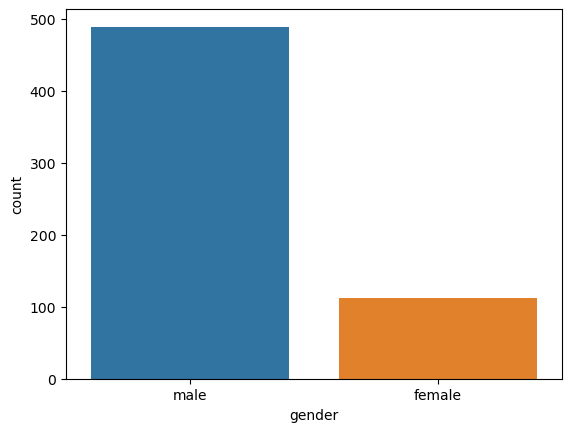

In [6]:
sns.countplot(x = df['gender'])

In [7]:
df['gender'].mode()[0]

'male'

<h3> We are using the mode value imputation which fills the null values in the gender column with the most occuring values in the column i.e., in our case the 'male' gender </h3>

In [8]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

<h3>WE try to fill the values in other columns with the mode value imputation as well.</h3>

<Axes: xlabel='married', ylabel='count'>

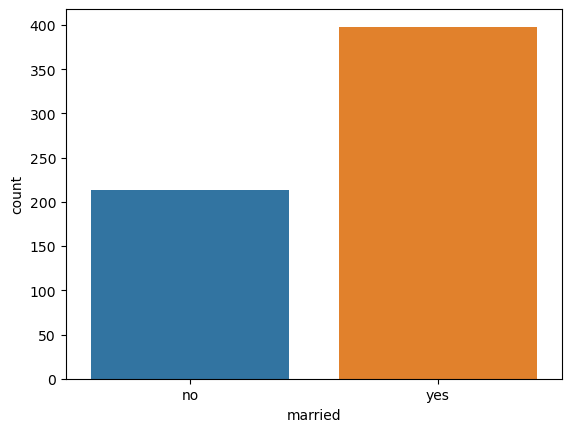

In [9]:
sns.countplot(x = df['married'])

In [10]:
df['married'].mode()[0]

'yes'

In [11]:
df['married'] = df['married'].fillna(df['married'].mode()[0])

<h4> Working on other columns </h4>
<h5> Dependents column </h5>

<Axes: xlabel='dependents', ylabel='count'>

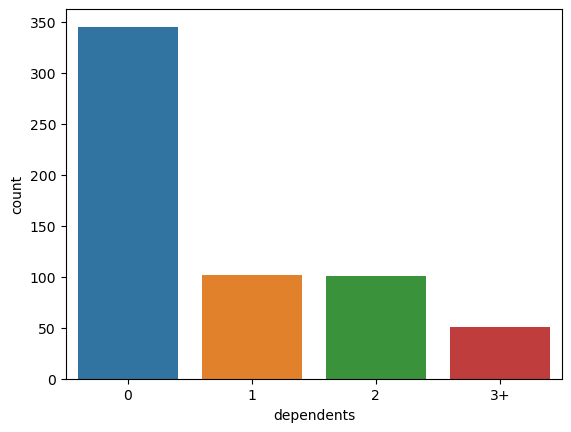

In [12]:
sns.countplot(x = df['dependents'])

In [13]:
df['dependents'].value_counts()

dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
df['dependents'].mode()[0]

'0'

In [15]:
df['dependents'] = df['dependents'].fillna(df['dependents']).mode()[0]

<h5> Self-employed </h5>

<Axes: xlabel='self_employed', ylabel='count'>

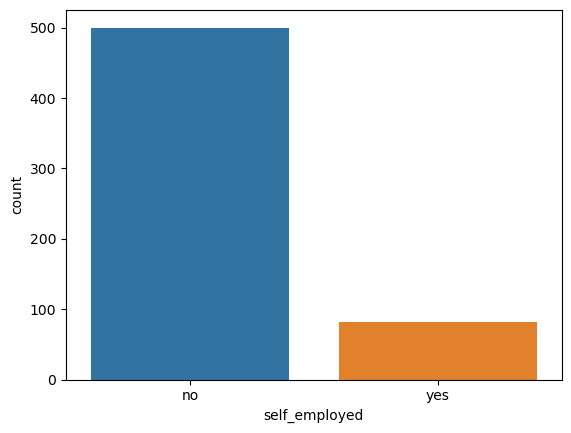

In [16]:
sns.countplot(x = df['self_employed'])

In [17]:
df['self_employed'].mode()[0]

'no'

In [18]:
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [19]:
#Chekcing if still any of the column has any null values
df.isna().sum()*100/len(df)

loan_id              0.000000
gender               0.000000
married              0.000000
dependents           0.000000
education            0.000000
self_employed        0.000000
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

<h4> Loan Amount </h4>

<h5> Numerical columns imputation </h5>
We are using the median value imputation

In [20]:
df['loanamount'].median()

128.0

In [21]:
df['loanamount'] = df['loanamount'].fillna(df['loanamount'].median())

<h4> Loan Amount term </h4>

In [22]:
df['loan_amount_term'].median()

360.0

In [23]:
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].median())

<h4> Credit History </h4>

<Axes: xlabel='credit_history', ylabel='count'>

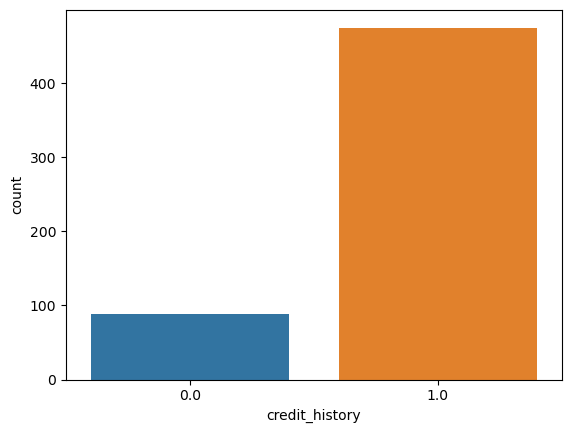

In [24]:
sns.countplot(x = df['credit_history'])

In [25]:
df['credit_history'].mode()[0]

1.0

In [26]:
df['credit_history'] = df['credit_history'].fillna(df['credit_history']).mode()[0]

In [27]:
df.isna().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

# Feature Creation

In [28]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,lp001003,male,yes,0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [45]:
df.replace({
    "loan_status":{"n":0, "y":1},
    "gender":{'male':0, 'female':1},
    "education":{'not graduate':0, 'graduate':1},
    "married":{'no':0, 'yes':1},
    'self_employed':{'no':0, 'yes':1}    
}, inplace=True)

In [46]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,urban,1
1,lp001003,0,1,0,1,0,4583,1508.0,128.0,360.0,1.0,rural,0
2,lp001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,urban,1
3,lp001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,urban,1
4,lp001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,rural,1
610,lp002979,0,1,0,1,0,4106,0.0,40.0,180.0,1.0,rural,1
611,lp002983,0,1,0,1,0,8072,240.0,253.0,360.0,1.0,urban,1
612,lp002984,0,1,0,1,0,7583,0.0,187.0,360.0,1.0,urban,1


# Splitting the data

In [47]:
def train_test_split_and_features(df):
    y = df['loan_status']
    X = df.drop(['loan_status', 'loan_id'], axis= 1)
    X = pd.get_dummies(data = X, columns = ["property_area", "dependents"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
    print(X.head(5))
    print(X.columns)
    features = list(X.columns)
    return X_train, X_test, y_train, y_test, features
    

<h3> We are using the one-hot-encoding technique to convert the categorical variables into binary variables. Basically if we use the property_area column which has 3 categorie, it will convert the 3 variables into 3 new columns that will have 0 and 1 values i.e., each categorybecomes a column and each column will say whether that particular loan applicant has '1' that is propert_area_rural, properrty_Area_urban, property_area_suburban or 0 if they are not that specific property_area </h3>

In [48]:
X_train, X_test, y_train, y_test, features = train_test_split_and_features(df)

   gender  married  education  self_employed  applicantincome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              1             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   property_area_rural  property_area_semiurban  property_area_urban  \
0                False                    False                 True   
1                 True                    Fa

# Fit and evaluate the model


In [55]:
def fit_and_evaluate(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(random_state=0,
                                         max_depth=4,
                                         min_samples_split=0.01,
                                         max_features=0.85,
                                         max_samples= 0.8)
    model = random_forest.fit(X_train, y_train)
    random_forest_predict = random_forest.predict(X_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("Confusion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:", random_forest_acc_score*100, '\n')
    print(classification_report(y_test, random_forest_predict))
    return model

In [56]:
model = fit_and_evaluate(X_train, X_test, y_train, y_test)

Confusion matrix
[[  3  48]
 [  1 133]]


Accuracy of Random Forest: 73.51351351351352 

              precision    recall  f1-score   support

           0       0.75      0.06      0.11        51
           1       0.73      0.99      0.84       134

    accuracy                           0.74       185
   macro avg       0.74      0.53      0.48       185
weighted avg       0.74      0.74      0.64       185



In [61]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance', 'feature']
importances.sort_values(by = 'importance', ascending=True, inplace=True)

# Feature Importance

<BarContainer object of 13 artists>

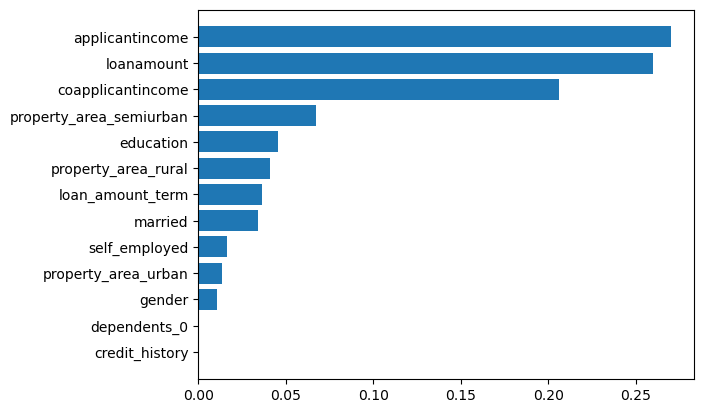

In [62]:
plt.barh(importances.feature, importances.importance)

In [65]:
# Predictions as probability
rf_proba = model.predict_proba(X_test)
rf_predict = model.predict(X_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.3625318  0.6374682 ]
 [0.25765741 0.74234259]
 [0.49232607 0.50767393]
 [0.25833789 0.74166211]
 [0.18606162 0.81393838]
 [0.41620174 0.58379826]
 [0.36034259 0.63965741]
 [0.42304602 0.57695398]
 [0.37172409 0.62827591]
 [0.22374941 0.77625059]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
-p